# DataCamp - (Python)

##   Exploratory Data Analysis in Python (NEW)


In [4]:
# data_folder = "C:/Users/Admin/Dropbox/Python/ficheiros/DataCamp/DataCamp - Exploratory Data Analysis in Python/"
data_folder = "/Users/miguelbaptista/Library/CloudStorage/OneDrive-Personal/Data_Science/Python/MOOC/DataCamp/ficheiros_2/"

In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from collections import Counter

from empiricaldist import Pmf, Cdf
from scipy.stats import norm
from scipy.stats import linregress
import statsmodels.formula.api as smf


In [6]:
'/Users/miguelbaptista/Library/CloudStorage/OneDrive-Personal/Data_Science/Python/Jupyter Notebook files/BNP/BNP_Paribas_Python_Developer.ipynb'

'/Users/miguelbaptista/Library/CloudStorage/OneDrive-Personal/Data_Science/Python/Jupyter Notebook files/BNP/BNP_Paribas_Python_Developer.ipynb'

# 0) Load files

In [8]:
# load course files
planes = pd.read_csv(data_folder + "planes.csv")
divorce = pd.read_csv(data_folder + "divorce.csv")
books = pd.read_csv(data_folder + "clean_books.csv")
ds_salaries_clean = pd.read_csv(data_folder + "ds_salaries_clean.csv")
unemployment = pd.read_csv(data_folder + "clean_unemployment.csv")

# 1) Getting to Know a Dataset

## Initial exploration

In [11]:
#vídeo

# missing values? No. But different types
print(books.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    350 non-null    object 
 1   author  350 non-null    object 
 2   rating  350 non-null    float64
 3   year    350 non-null    int64  
 4   genre   350 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 13.8+ KB
None


In [12]:
# missing values? No. But different types
print(books.describe())

           rating         year
count  350.000000   350.000000
mean     4.608571  2013.508571
std      0.226941     3.284711
min      3.300000  2009.000000
25%      4.500000  2010.000000
50%      4.600000  2013.000000
75%      4.800000  2016.000000
max      4.900000  2019.000000


In [13]:
# genres
display(books["genre"].value_counts())

genre
Non Fiction    179
Fiction        131
Childrens       40
Name: count, dtype: int64

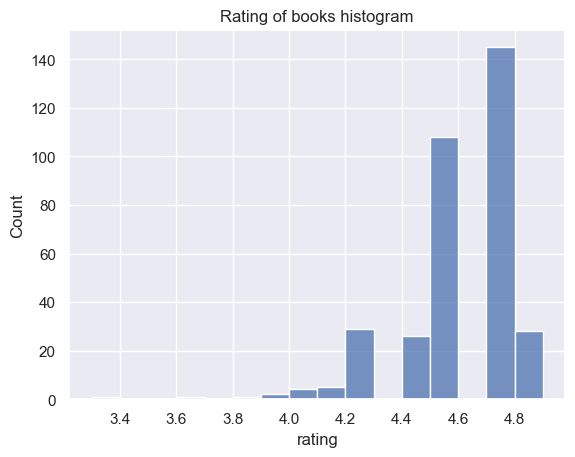

In [14]:
# Visualizing numerical data - distribution
sns.histplot(data=books, x="rating", binwidth=0.1)
plt.title("Rating of books histogram")
plt.show()

## Data Validation

In [16]:
# vídeo

# Validating data types
# print(books.info())
print(books.dtypes)

# Updating data types
books["year"] = books["year"].astype(int)
print(books.dtypes)

# str, int, float, dict, list, bool


name       object
author     object
rating    float64
year        int64
genre      object
dtype: object
name       object
author     object
rating    float64
year        int64
genre      object
dtype: object


In [17]:
# Validating categorical data (True or False)
books["genre"].isin(["Fiction", "Non Fiction"])

# invert
~books["genre"].isin(["Fiction", "Non Fiction"])

# filter
books[books["genre"].isin(["Fiction", "Non Fiction"])].head()

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,2011,Fiction


In [18]:
# Validate numerical data
books.select_dtypes("number").head()

,rating,year
0,4.7,2016
1,4.6,2011
2,4.7,2018
3,4.7,2017
4,4.8,2019


In [19]:
print(books["year"].min())
print(books["year"].max())

2009
2019


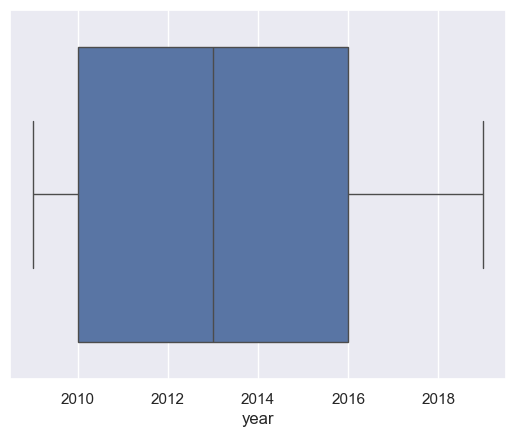

In [20]:
# boxplot
sns.boxplot(data=books, x="year")
plt.show()

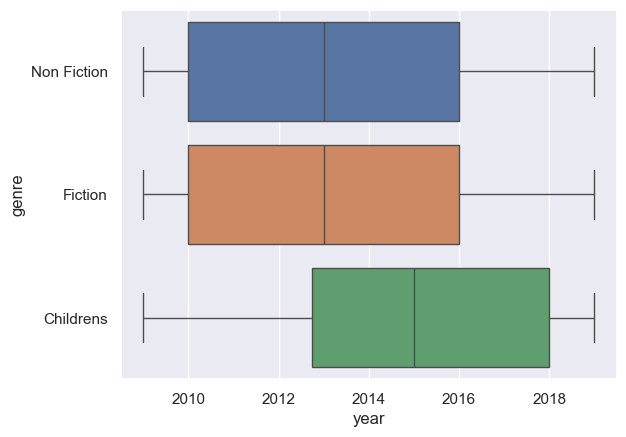

In [21]:
sns.boxplot(data=books, x="year", y="genre", hue="genre")
plt.show()

#### Exercícios

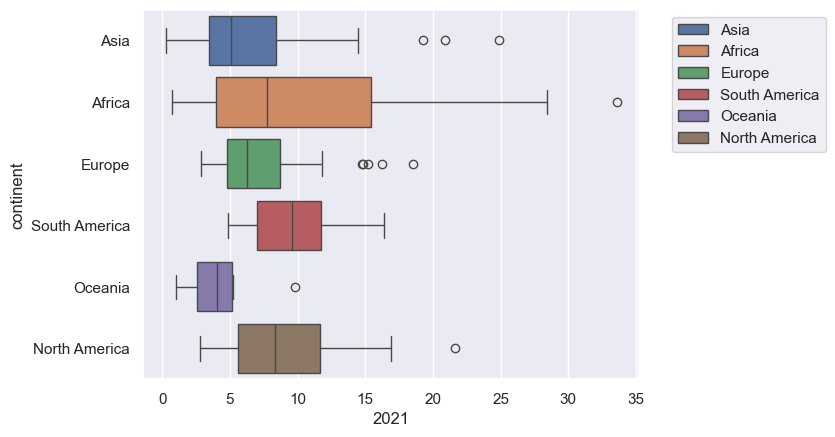

In [23]:
# exercise
sns.boxplot(data=unemployment, x="2021", y="continent", hue="continent")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

## Data summarization

In [25]:
# video

# Exploring groups of data
books.groupby("genre")[["rating", "year"]].mean()

# Aggregating function
# .sum()
# .count()
# .min()
# .max()
# .var()

,rating,year
genre,,
Childrens,4.780000,2015.075000
Fiction,4.570229,2013.022901
Non Fiction,4.598324,2013.513966


In [26]:
# .agg()
display(books[["rating", "year"]].agg(["mean", "std"]))

,rating,year
mean,4.608571,2013.508571
std,0.226941,3.284711


In [27]:
# Specifying aggregations for columns
display(books.agg({"rating": ["mean", "std"], "year": ["median"]}))

,rating,year
mean,4.608571,NaN
std,0.226941,NaN
median,NaN,2013.0


In [28]:
# Named summary columns
display(books.agg(mean_rating=("rating", "mean"),
                  std_rating=("rating", "std"),
                  median_year=("year", "median")))


,rating,year
mean_rating,4.608571,NaN
std_rating,0.226941,NaN
median_year,NaN,2013.0


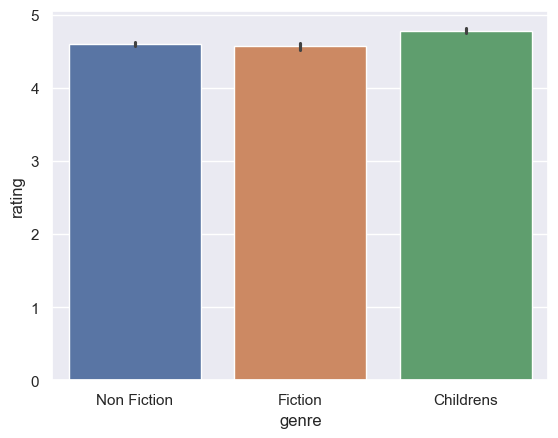

In [29]:
# Visualizing categorical summaries
sns.barplot(data=books, x="genre", y="rating", hue="genre")
plt.show()

#### Exercícios

In [31]:
print([str(i) for i in list(range(2010, 2022))])

['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']


In [32]:
print([i for i in unemployment.columns if len(i)==4])

['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']


In [33]:
# Exercícios
int_columns = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

unemployment[int_columns].agg(["mean", "std"])

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
mean,8.409286,8.315440,8.317967,8.344780,8.179670,8.058901,7.925879,7.668626,7.426429,7.243736,8.420934,8.390879
std,6.248887,6.266795,6.367270,6.416041,6.284241,6.161170,6.045439,5.902152,5.818915,5.696573,6.040915,6.067192


In [34]:
# Print yearly mean and standard deviation grouped by continent
display(unemployment.groupby("continent")[int_columns].agg(["mean", "std"]))

2010                 2011                 2012            \
                    mean       std       mean       std       mean       std   
continent                                                                      
Africa          9.343585  7.411259   9.369245  7.401556   9.240755  7.264542   
Asia            6.240638  5.146175   5.942128  4.779575   5.835319  4.756904   
Europe         11.008205  6.392063  10.947949  6.539538  11.325641  7.003527   
North America   8.663333  5.115805   8.563333  5.377041   8.448889  5.495819   
Oceania         3.622500  2.054721   3.647500  2.008466   4.103750  2.723118   
South America   6.870833  2.807058   6.518333  2.801577   6.410833  2.936508   

                    2013                 2014            ...      2017  \
                    mean       std       mean       std  ...      mean   
continent                                                ...             
Africa          9.132453  7.309285   9.121321  7.291359  ...  9.284528   
Asia            5.852128  4.668405   5.853191  4.681301  ...  6.171277   
Europe         11.466667  6.969209  10.971282  6.759765  ...  8.359744   
North America   8.840556  6.081829   8.512222  5.801927  ...  7.391111   
Oceania         3.980000  2.640119   3.976250  2.659205  ...  3.872500   
South America   6.335000  2.808780   6.347500  2.834332  ...  7.281667   

                             2018                2019                 2020  \
                    std      mean       std      mean       std       mean   
continent                                                                    
Africa         7.407620  9.237925  7.358425  9.264340  7.455293  10.307736   
Asia           5.277201  6.090213  5.409128  5.949149  5.254008   7.012340   
Europe         5.177845  7.427436  4.738206  6.764359  4.124734   7.470513   
North America  5.326446  7.281111  5.253180  7.095000  4.770490   9.297778   
Oceania        2.492834  3.851250  2.455893  3.773750  2.369068   4.273750   
South America  3.398994  7.496667  3.408856  7.719167  3.379845  10.275000   

                              2021            
                    std       mean       std  
continent                                     
Africa         7.928166  10.473585  8.131636  
Asia           5.699609   6.906170  5.414745  
Europe         4.071218   7.414872  3.947825  
North America  4.963045   9.155000  5.076482  
Oceania        2.617490   4.280000  2.671522  
South America  3.411263   9.924167  3.611624  

[6 rows x 24 columns]

In [35]:
continent_summary = unemployment.groupby("continent").agg( 
    
    # Create the mean_rate_2021 column
    mean_rate_2021=("2021", "mean"),
    # Create the std_rate_2021 column
    std_rate_2021=("2021", "std")
)

continent_summary

,mean_rate_2021,std_rate_2021
continent,,
Africa,10.473585,8.131636
Asia,6.906170,5.414745
Europe,7.414872,3.947825
North America,9.155000,5.076482
Oceania,4.280000,2.671522
South America,9.924167,3.611624


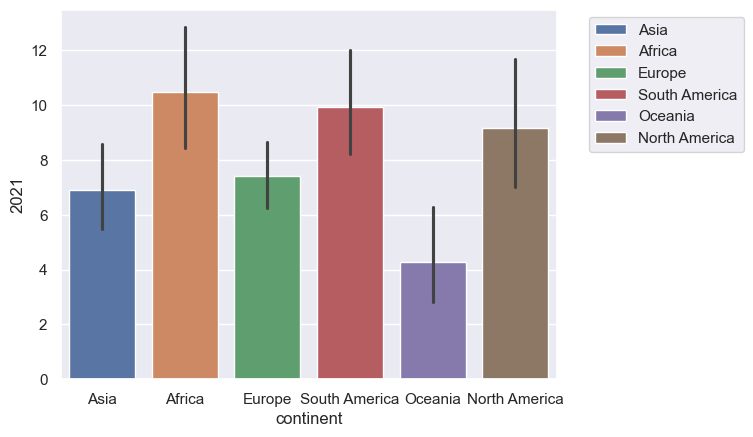

In [36]:
# Create a bar plot of continents and their average unemployment
sns.barplot(data=unemployment, x="continent", y="2021", hue="continent")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

# 2) Data Cleaning and Imputation

## 2.1) Addressing missing data

In [39]:
# vídeo

# Why missing data matters: Missing values can skew distributions and lead to incorrect conclusions

# copy from existing dataset
salaries = ds_salaries_clean.copy()

print(salaries.isna().sum())

# - Rule of thumb: drop missing values if they represent less than 5% of the total values (but check anyway)
# Impute: mean, median or mode (depends on the case)
# Impute by a rule: for example, replace non-salary with a parameter multiplied by years of experience

threshold = len(salaries)*0.05
print("\nthreshold: ", threshold, "\n")

cols_to_drop = salaries.columns[salaries.isna().sum() <= threshold]
print(cols_to_drop)

Working_Year            0
Designation             0
Experience              0
Employment_Status       0
Employee_Location       0
Company_Size            0
Remote_Working_Ratio    0
Salary_USD              0
dtype: int64

threshold:  30.35 

Index(['Working_Year', 'Designation', 'Experience', 'Employment_Status',
       'Employee_Location', 'Company_Size', 'Remote_Working_Ratio',
       'Salary_USD'],
      dtype='object')


In [40]:
# Drop
# salaries.dropna(subset=cols_to_drop, inplace=True)

#####################################################################################

# Imputing a summary statistic
cols_with_missing_values = salaries.columns[salaries.isna().sum() > 0]

for col in cols_with_missing_values[:-1]:
    salaries[col].fillna(salaries[col].mode()[0])

#####################################################################################

# Imputing by sub-group
salaries_dict = salaries.groupby("Experience")["Salary_USD"].median().to_dict()
print(salaries_dict)

salaries["Salary_USD"] = salaries["Salary_USD"].fillna(salaries["Experience"].map(salaries_dict))

# OR
# salaries['Salary_USD'].fillna(salaries.groupby('Experience')['Salary_USD'].transform('median'), inplace=True)

#####################################################################################

{'Entry': 53948.0, 'Executive': 163694.5, 'Mid': 73465.0, 'Senior': 129380.0}


In [41]:
salaries["Experience"].map(salaries_dict)

0       73465.0
1      129380.0
2      129380.0
3       73465.0
4      129380.0
         ...   
602    129380.0
603    129380.0
604    129380.0
605    129380.0
606     73465.0
Name: Experience, Length: 607, dtype: float64

### Dealing with missing data

In [43]:
planes = pd.read_csv(data_folder + "planes.csv")
print(planes.shape)
planes.head()

(10660, 11)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0


In [44]:
# Count the number of missing values in each column
print(planes.isna().sum())

Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64


In [45]:
# Find the 5 percent threshold
threshold = len(planes) * 0.05
print("threshold:", threshold, "\n")

# Create a filter
cols_to_drop = planes.columns[planes.isna().sum() <= threshold]

# Drop missing values for columns below the threshold
planes.dropna(subset=cols_to_drop, inplace=True)

print(planes.isna().sum())

threshold: 533.0 

Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price              368
dtype: int64


In [46]:
# NEW shape after dropna
print(planes.shape)
planes.head()

(8508, 11)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0


### Strategies for remaining missing data ("Additional_Info" and "Price" columns)

In [48]:
# Check the values of the Additional_Info column
print(planes["Additional_Info"].value_counts())

Additional_Info
No info                         6399
In-flight meal not included     1525
No check-in baggage included     258
1 Long layover                    14
Change airports                    7
No Info                            2
Business class                     1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64


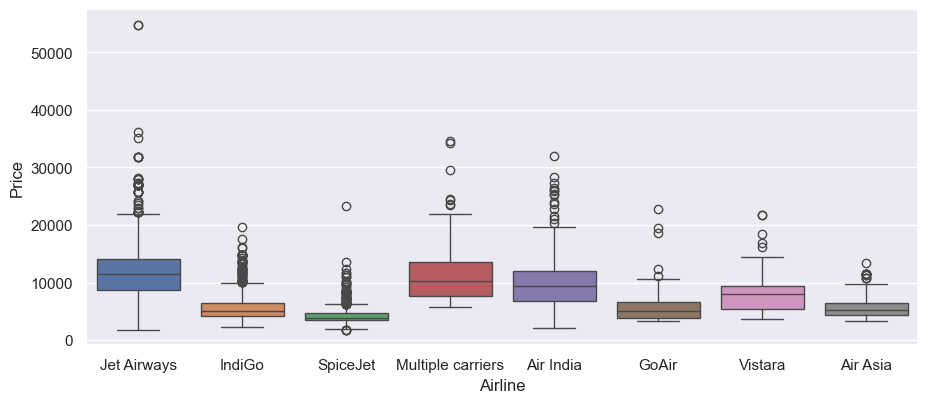

In [49]:
# Create a box plot of Price by Airline
sns.boxplot(data=planes, x="Airline", y="Price", hue="Airline")

plt.subplots_adjust(left=0, bottom=0, right=1.3, top=0.7, wspace=0, hspace=0)
plt.show()

Question:

How should you deal with the missing values in "Additional_Info" and "Price"?

Answer:

**- Remove the "Additional_Info" column.**

**- Impute the median by "Airline" for missing values of "Price".**

### Imputing missing plane prices

In [53]:
# Calculate median plane ticket prices by Airline
airline_prices = planes.groupby("Airline")["Price"].median()
print(airline_prices)

Airline
Air Asia              5192.0
Air India             9443.0
GoAir                 5003.5
IndiGo                5054.0
Jet Airways          11507.0
Multiple carriers    10197.0
SpiceJet              3873.0
Vistara               8028.0
Name: Price, dtype: float64


In [54]:
# Convert to a dictionary
prices_dict = airline_prices.to_dict()

# Map the dictionary to missing values of Price by Airline
planes["Price"] = planes["Price"].fillna(planes["Airline"].map(prices_dict))

# Check for missing values
print(planes.isna().sum())

Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price                0
dtype: int64


### Extra: Remove the "Additional_Info" column

In [56]:
# Drop missing values for columns below the threshold
planes.dropna(subset=["Additional_Info"], inplace=True)

print(planes.isna().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64


## 2.2) Converting and analyzing categorical data

### Video

In [59]:
# Salaries data
salaries.head()

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD
0,2020,Data Scientist,Mid,FT,DE,L,0,76227.0
1,2020,Machine Learning Scientist,Senior,FT,JP,S,0,248257.0
2,2020,Big Data Engineer,Senior,FT,GB,M,50,104100.0
3,2020,Product Data Analyst,Mid,FT,HN,S,0,19097.0
4,2020,Machine Learning Engineer,Senior,FT,US,L,50,143225.0


In [60]:
# vídeo

display(salaries.select_dtypes("object").head())

,Designation,Experience,Employment_Status,Employee_Location,Company_Size
0,Data Scientist,Mid,FT,DE,L
1,Machine Learning Scientist,Senior,FT,JP,S
2,Big Data Engineer,Senior,FT,GB,M
3,Product Data Analyst,Mid,FT,HN,S
4,Machine Learning Engineer,Senior,FT,US,L


Unique job titles: 50 



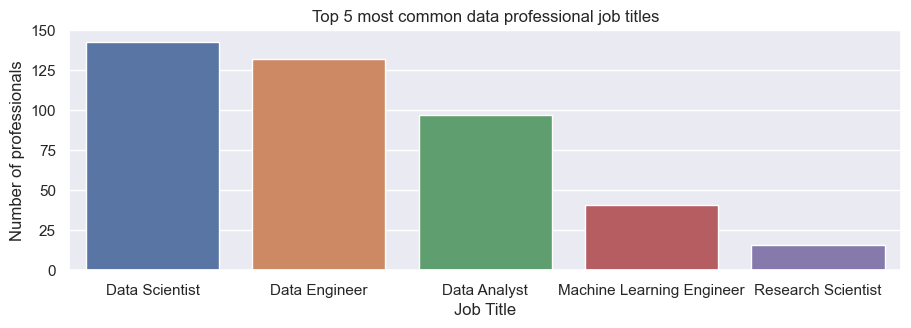

In [61]:
# Job titles
print("Unique job titles:", salaries["Designation"].nunique(), "\n")

# There are 50, but the 
salaries["Designation"].value_counts()


# plot
salaries_top_5_dict = salaries["Designation"].value_counts()[:5].to_dict()
salaries_top_5_df = pd.DataFrame(index=list(salaries_top_5_dict.keys()), data=list(salaries_top_5_dict.values()))

sns.barplot(data=salaries_top_5_df, 
            x=salaries_top_5_df.index, y=salaries_top_5_df[0], 
            hue=salaries_top_5_df.index)

plt.subplots_adjust(left=0, bottom=0, right=1.3, top=0.5, wspace=0, hspace=0)
plt.xlabel("Job Title")
plt.ylabel("Number of professionals")
plt.title("Top 5 most common data professional job titles")
plt.show()

In [62]:
# complete list
salaries["Designation"].value_counts()

Designation
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                

In [63]:
# Search a column for a specific string or multiple strings
print(salaries["Designation"].str.contains("Scientist"))

# check the names
print(list(set(salaries[salaries["Designation"].str.contains("Scientist")]["Designation"])))

0       True
1       True
2      False
3      False
4      False
       ...  
602    False
603    False
604    False
605    False
606     True
Name: Designation, Length: 607, dtype: bool
['Research Scientist', 'Applied Machine Learning Scientist', 'Staff Data Scientist', 'Principal Data Scientist', 'Data Scientist', 'Lead Data Scientist', 'Applied Data Scientist', 'Machine Learning Scientist', 'AI Scientist']


In [64]:
# Finding multiple phrases in strings
print(salaries["Designation"].str.contains("Machine Learning|AI")) # avoid spaces, otherwise it captures the spaces

# check the names
print(list(set(salaries[salaries["Designation"].str.contains("Machine Learning|AI")]["Designation"])))

0      False
1       True
2      False
3      False
4       True
       ...  
602    False
603    False
604    False
605    False
606     True
Name: Designation, Length: 607, dtype: bool
['Applied Machine Learning Scientist', 'Machine Learning Manager', 'Machine Learning Infrastructure Engineer', 'Machine Learning Engineer', 'Machine Learning Developer', 'Lead Machine Learning Engineer', 'Head of Machine Learning', 'Machine Learning Scientist', 'AI Scientist']


In [65]:
# Finding multiple phrases in strings: Any that start with X
print(salaries["Designation"].str.contains("^Data"))

# check names
print(list(set(salaries[salaries["Designation"].str.contains("^Data")]["Designation"])))

0       True
1      False
2      False
3      False
4      False
       ...  
602     True
603     True
604     True
605     True
606    False
Name: Designation, Length: 607, dtype: bool
['Data Analytics Manager', 'Data Architect', 'Data Scientist', 'Data Science Engineer', 'Data Analytics Lead', 'Data Science Consultant', 'Data Engineering Manager', 'Data Specialist', 'Data Science Manager', 'Data Analyst', 'Data Engineer', 'Data Analytics Engineer']


,Designation,Job_Category
0,Data Scientist,Data Science
1,Machine Learning Scientist,Machine Learning
2,Big Data Engineer,Data Engineering
3,Product Data Analyst,Data Analytics
4,Machine Learning Engineer,Machine Learning


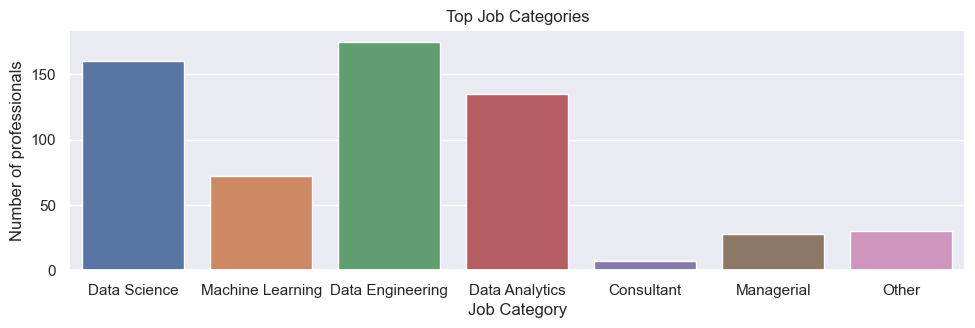

In [66]:
# Finding multiple phrases in strings
job_categories = ["Data Science", "Data Analytics", "Data Engineering", "Machine Learning", "Managerial", "Consultant"]

data_science = "Data Scientist|NLP"
data_analyst = "Analyst|Analytics"
data_engineer = "Data Engineer|ETL|Architect|Infrastructure"
ml_engineer = "Machine Learning|ML|Big Data|AI"
manager = "Manager|Head|Director|Lead|Principal|Staff"
consultant = "Consultant|Freelance"

conditions = [(salaries["Designation"].str.contains(data_science)),
              (salaries["Designation"].str.contains(data_analyst)),
              (salaries["Designation"].str.contains(data_engineer)),
             (salaries["Designation"].str.contains(ml_engineer)),
             (salaries["Designation"].str.contains(manager)),
             (salaries["Designation"].str.contains(consultant))
             ]

# Create the categorical column
salaries["Job_Category"] = np.select(conditions, job_categories, default="Other")

display(salaries[["Designation", "Job_Category"]].head())

# Visualizing job category frequency
sns.countplot(data=salaries, x="Job_Category", hue="Job_Category")
plt.subplots_adjust(left=0, bottom=0, right=1.4, top=0.5, wspace=0, hspace=0)
plt.xlabel("Job Category")
plt.ylabel("Number of professionals")
plt.title("Top Job Categories")
plt.show()

### Finding the number of unique values

In [68]:
planes.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0


In [69]:
# Filter the DataFrame for object columns
non_numeric = planes.select_dtypes("object")

# Loop through columns
for i in non_numeric.columns:
    
  # Print the number of unique values
  print(f"Number of unique values in {i} column: ", non_numeric[i].nunique())
    

Number of unique values in Airline column:  8
Number of unique values in Date_of_Journey column:  44
Number of unique values in Source column:  5
Number of unique values in Destination column:  6
Number of unique values in Route column:  122
Number of unique values in Dep_Time column:  218
Number of unique values in Arrival_Time column:  1200
Number of unique values in Duration column:  362
Number of unique values in Total_Stops column:  5
Number of unique values in Additional_Info column:  9


### Flight duration categories

In [71]:
planes["Duration"]

0            19h
1         5h 25m
2         4h 45m
3         2h 25m
4        15h 30m
          ...   
10654     2h 40m
10655     2h 30m
10656     2h 35m
10658     2h 40m
10659     8h 20m
Name: Duration, Length: 8208, dtype: object

In [72]:
# Create a list of categories
flight_categories = ["Short-haul", "Medium", "Long-haul"]

# Create short-haul values
short_flights = "^0h|^1h|^2h|^3h|^4h"

# Create medium-haul values
medium_flights = "^5h|^6h|^7h|^8h|^9h"

# Create long-haul values
long_flights = "^10h|^11h|^12h|^13h|^14h|^15h|^16h"

### Adding duration categories

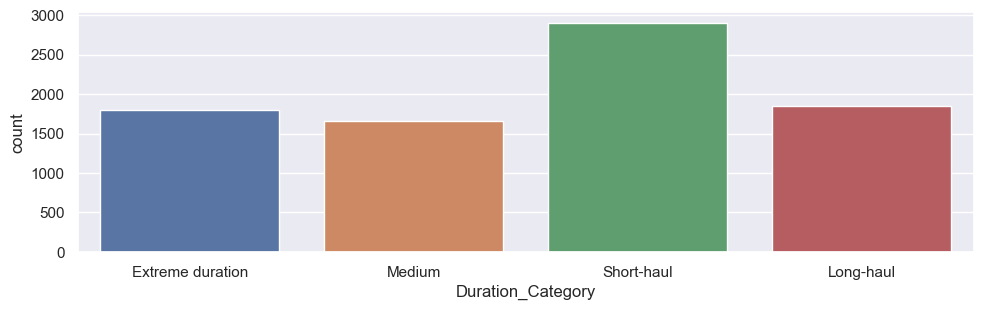

In [74]:
# Create conditions for values in flight_categories to be created
conditions = [
    (planes["Duration"].str.contains(short_flights)),
    (planes["Duration"].str.contains(medium_flights)),
    (planes["Duration"].str.contains(long_flights))
]

# Apply the conditions list to the flight_categories
planes["Duration_Category"] = np.select(conditions, 
                                        flight_categories,
                                        default="Extreme duration")

# Plot the counts of each category
sns.countplot(data=planes, x="Duration_Category", hue="Duration_Category")

plt.subplots_adjust(left=0, bottom=0, right=1.4, top=0.5, wspace=0, hspace=0)
# plt.xlabel("Duration Category")
# plt.ylabel("Count")
# plt.title("Duration Categories")
plt.show()

## 2.3) Working with numeric data

In [76]:
salaries.head()

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD,Job_Category
0,2020,Data Scientist,Mid,FT,DE,L,0,76227.0,Data Science
1,2020,Machine Learning Scientist,Senior,FT,JP,S,0,248257.0,Machine Learning
2,2020,Big Data Engineer,Senior,FT,GB,M,50,104100.0,Data Engineering
3,2020,Product Data Analyst,Mid,FT,HN,S,0,19097.0,Data Analytics
4,2020,Machine Learning Engineer,Senior,FT,US,L,50,143225.0,Machine Learning


In [77]:
# vídeo

# pd.Series.str.replace("characters to remove", "characters to replace with")


# salaries["Salary_Rupees"] = salaries["Salary_Rupees"].str.replace(",", "")

# salaries["Salary_Rupees"] = salaries["Salary_Rupees"].astype(float)

## 1 Indian Rupee = 0.012 USD
# salaries["Salary_USD"] = salaries["Salary_Rupees"] * 0.012


In [78]:
salaries.groupby("Company_Size")["Salary_USD"].mean()

Company_Size
L    113857.282828
M    111625.328221
S     74126.313253
Name: Salary_USD, dtype: float64

In [79]:
# Adding summary statistics into a DataFrame
salaries["std_dev"] = salaries.groupby("Experience")["Salary_USD"].transform(lambda x: round(x.std(), 1))

print(salaries[["Experience", "std_dev"]].value_counts())

Experience  std_dev 
Senior      55086.3     280
Mid         61014.9     213
Entry       42390.4      88
Executive   111783.6     26
Name: count, dtype: int64


In [80]:
# median by company size
salaries["median_by_comp_size"] = salaries.groupby("Company_Size")["Salary_USD"].transform(lambda x: x.median())

print(salaries[["Company_Size", "median_by_comp_size"]].head())


  Company_Size  median_by_comp_size
0            L              95483.0
1            S              62064.0
2            M             108076.0
3            S              62064.0
4            L              95483.0


### Flight duration

In [82]:
# For this exercise I'll create a new column, "Duration_hours"

# create function
def transform_minutes(text):
    if "h" in text and "m" in text:
        minutes = int(text.split("h")[1].split("m")[0].strip())
        minutes_hours = round(minutes / 60, 2)
        minutes_hours_text = str(minutes_hours)[1:]
        hours_text = text.split("h")[0] + minutes_hours_text
        return hours_text
        
    elif "h" not in text and "m" in text:
        minutes = int(text.split("m")[0].strip())
        minutes_hours = round(minutes / 60, 2)
        minutes_hours_text = str(minutes_hours)[1:]
        hours_text = minutes_hours_text
        return hours_text
        
    else:
        return text.strip().replace("h", "")

print(transform_minutes("5h 30m"))
print(transform_minutes("5h "))
print(transform_minutes("5m"))

5.5
5
.08


0        19h
1     5h 25m
2     4h 45m
3     2h 25m
4    15h 30m
Name: Duration, dtype: object


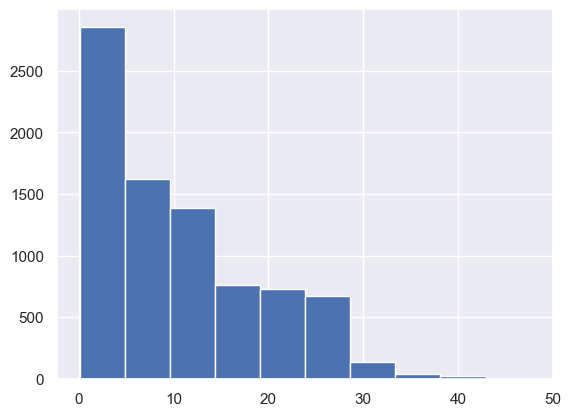

In [83]:
# Preview the column
print(planes["Duration"].head())

# Create new column "Duration_hours" (for this exercise)
planes["Duration_hours"] = planes["Duration"].apply(lambda x: transform_minutes(x))

# Convert to float data type
planes["Duration_hours"] = planes["Duration_hours"].astype(float)

# Plot a histogram
planes["Duration_hours"].hist()
plt.show()

In [84]:
planes["Duration_hours"].sort_values(ascending=False)

10433    47.67
1062     47.00
8391     42.75
5938     42.08
7888     41.33
         ...  
1411      1.25
7222      1.25
6442      1.25
839       1.25
6458      0.08
Name: Duration_hours, Length: 8208, dtype: float64

In [85]:
planes.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_Category,Duration_hours
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,Extreme duration,19.00
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,Medium,5.42
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,Short-haul,4.75
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0,Short-haul,2.42
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0,Long-haul,15.50


### Adding descriptive statistics

In [87]:
# Price standard deviation by Airline
planes["airline_price_st_dev"] = planes.groupby("Airline")["Price"].transform(lambda x: x.std())

print(planes[["Airline", "airline_price_st_dev"]].value_counts())

Airline            airline_price_st_dev
Jet Airways        4189.074664             2964
IndiGo             2218.605260             1585
Air India          3691.028933             1346
Multiple carriers  3514.643747              931
SpiceJet           1799.368945              632
Vistara            2885.703432              362
Air Asia           2000.745294              248
GoAir              2088.216407              140
Name: count, dtype: int64


In [88]:
# Median Duration by Airline
planes["airline_median_duration"] = planes.groupby("Airline")["Duration_hours"].transform(lambda x: x.median())

print(planes[["Airline","airline_median_duration"]].value_counts())

Airline            airline_median_duration
Jet Airways        13.33                      2964
IndiGo             2.92                       1585
Air India          15.42                      1346
Multiple carriers  10.25                       931
SpiceJet           2.50                        632
Vistara            3.17                        362
Air Asia           2.83                        248
GoAir              2.92                        140
Name: count, dtype: int64


In [89]:
# Mean Price by Destination
planes["price_destination_mean"] = planes.groupby("Destination")["Price"].transform(lambda x: x.mean())

print(planes[["Destination","price_destination_mean"]].value_counts())

Destination  price_destination_mean
Cochin       10448.270251              3506
Banglore     9103.417423               2204
Delhi        5243.746331                954
New Delhi    11586.090129               699
Hyderabad    5210.427788                547
Kolkata      4921.046980                298
Name: count, dtype: int64


## 2.4) Handling outliers

In [91]:
# vídeo

salaries["Salary_USD"].describe()

count       607.000000
mean     107225.836903
std       67752.393254
min        2730.000000
25%       59893.000000
50%       96982.000000
75%      143225.000000
max      572900.000000
Name: Salary_USD, dtype: float64

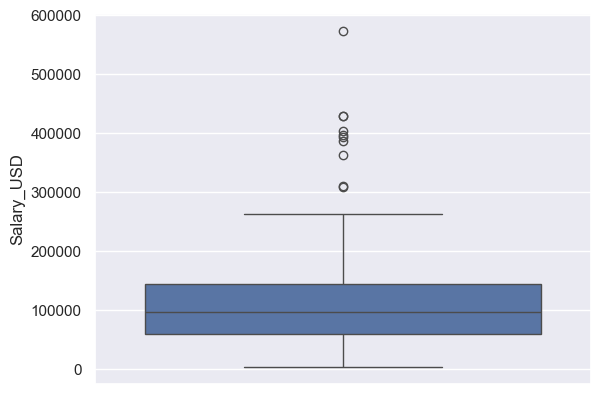

In [92]:
# Using the IQR (Interquartile range)

# IQR = 75th - 25th percentile

# we can see the outliers in a boxplot
sns.boxplot(data=salaries, y="Salary_USD")
plt.show()

In [93]:
# IQR = 75th - 25th percentile
# Upper Outliers > 75th percentile + (1.5*IQR)
# Lower Outliers < 25th percentile - (1.5 * IQR)

# Identifying thresholds

# 75th percentile
seventy_fifth = salaries["Salary_USD"].quantile(0.75)

# 25th percentile
twenty_fifth = salaries["Salary_USD"].quantile(0.25)

# IQR
salaries_iqr = seventy_fifth - twenty_fifth
print("Salaries IQR: ", salaries_iqr)

##########

upper = seventy_fifth + (1.5*salaries_iqr)
lower = twenty_fifth - (1.5*salaries_iqr)
print("Upper Outliers > ", upper)
print("Lower Outliers < ", lower) # <0 -> not possible, since we are working with salaries


Salaries IQR:  83332.0
Upper Outliers >  268223.0
Lower Outliers <  -65105.0


In [94]:
# Subsetting our data
salaries[(salaries["Salary_USD"] < lower) | (salaries["Salary_USD"] > upper)][["Experience", "Employee_Location", "Salary_USD"]]

,Experience,Employee_Location,Salary_USD
25,Executive,US,310321.0
33,Mid,US,429675.0
63,Senior,US,393392.0
97,Mid,US,429675.0
157,Mid,US,403895.0
225,Executive,US,397211.0
252,Executive,US,572900.0
482,Executive,US,309366.0
519,Senior,US,362837.0
523,Senior,US,386708.0


In [95]:
# Outliers are extreme values -> may not accurately represent our data
# Can change the mean and standard deviation
# Statistical tests and machine learning models need normally distributed data

# What to do with outliers? Do we remove them? Is there an error in data collection
no_outliers_df = salaries[(salaries["Salary_USD"] > lower) & (salaries["Salary_USD"] < upper)].copy()
display(no_outliers_df.describe())

,Working_Year,Remote_Working_Ratio,Salary_USD,std_dev,median_by_comp_size
count,597.000000,597.000000,597.000000,597.000000,597.000000
mean,2021.412060,70.686767,102328.480737,57389.662479,97727.177554
std,0.688634,40.797800,55910.790653,12228.183775,15323.931559
min,2020.000000,0.000000,2730.000000,42390.400000,62064.000000
25%,2021.000000,50.000000,59819.000000,55086.300000,95483.000000
50%,2022.000000,100.000000,95483.000000,55086.300000,108076.000000
75%,2022.000000,100.000000,141565.000000,61014.900000,108076.000000
max,2022.000000,100.000000,263534.000000,111783.600000,108076.000000


In [96]:
print(salaries.shape)
print(no_outliers_df.shape)

(607, 11)
(597, 11)


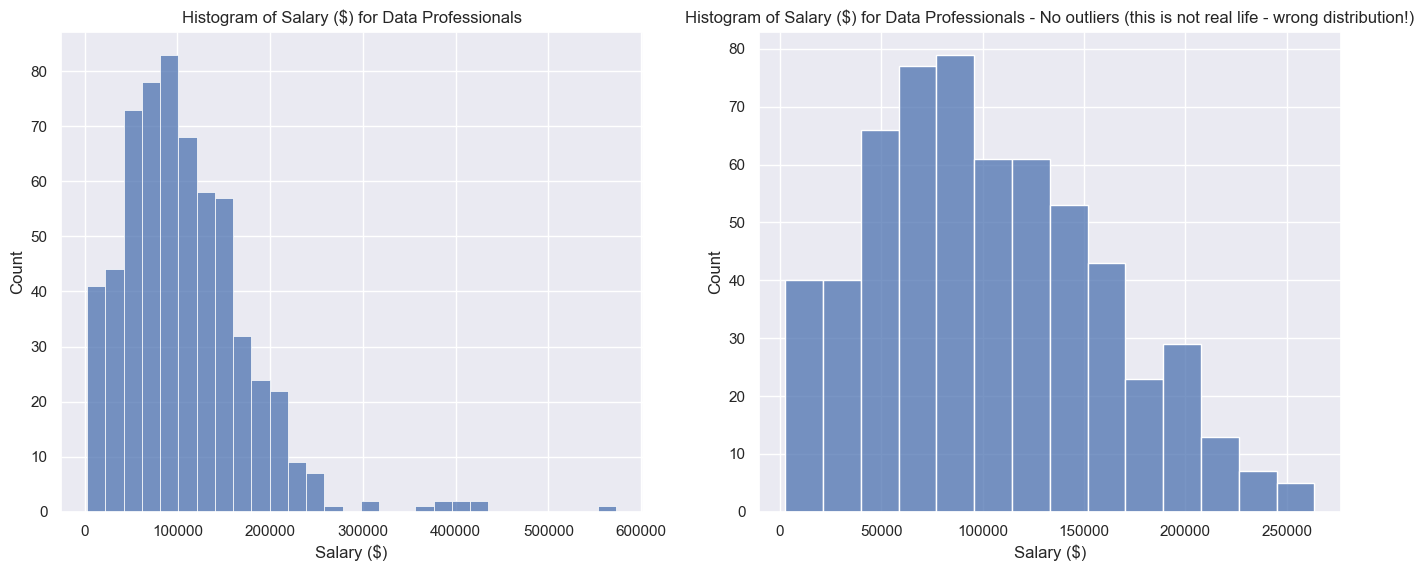

In [97]:
# Distribution of salaries


plt.subplot(1, 2, 1)
sns.histplot(data=salaries, x="Salary_USD")
plt.title("Histogram of Salary ($) for Data Professionals")
plt.xlabel("Salary ($)")


plt.subplot(1, 2, 2)
sns.histplot(data=no_outliers_df, x="Salary_USD")
plt.title("Histogram of Salary ($) for Data Professionals - No outliers (this is not real life - wrong distribution!)")
plt.xlabel("Salary ($)")

plt.subplots_adjust(left=0, bottom=0, right=2, top=1, wspace=0.2, hspace=0.4)
plt.show()

In [98]:
#

### Identifying outliers

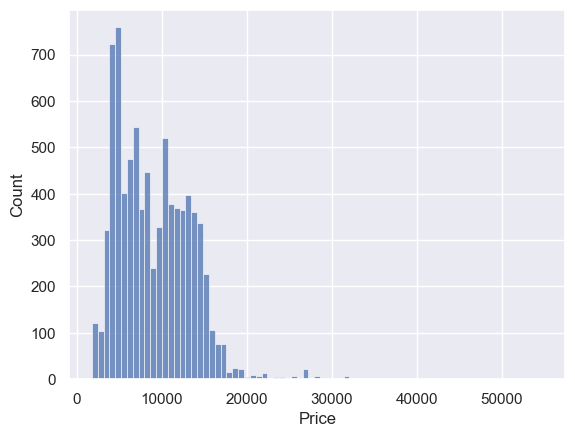

count    8208.000000
mean       10.699274
std         8.448892
min         0.080000
25%         2.830000
50%         8.670000
75%        15.500000
max        47.670000
Name: Duration_hours, dtype: float64


In [100]:
# Plot a histogram of flight prices
sns.histplot(data=planes, x="Price")
plt.show()

# Display descriptive statistics for flight duration
print(planes["Duration_hours"].describe())

- **Question**: Which column potentially contains outliers?
- **Answer**: Price and Duration

### Removing outliers

In [103]:
# Find the 75th and 25th percentiles
price_seventy_fifth = planes["Price"].quantile(0.75)
price_twenty_fifth = planes["Price"].quantile(0.25)

# Calculate iqr
prices_iqr = price_seventy_fifth - price_twenty_fifth

# Calculate the thresholds
upper = price_seventy_fifth + (1.5 * prices_iqr)
lower = price_twenty_fifth - (1.5 * prices_iqr)

# Subset the data
planes = planes[(planes["Price"] < upper) & (planes["Price"] > lower)]

print(planes["Price"].describe())

count     8141.000000
mean      8873.148692
std       4002.789293
min       1759.000000
25%       5224.000000
50%       8372.000000
75%      12121.000000
max      22270.000000
Name: Price, dtype: float64


In [104]:
print(planes.shape)

(8141, 16)


# 3) Relationships in Data

## 3.1) Patterns over time

In [107]:
# vídeo

# load data
divorce = pd.read_csv(data_folder + "divorce.csv")

print(divorce.shape)
divorce.head()

(2209, 10)


,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN
2,2011-01-02,1969-04-06,Preparatory,5000.0,1970-02-16,Professional,5000.0,2000-02-02,2.0,2.0
3,2011-01-02,1979-11-13,Secondary,12000.0,1981-05-13,Secondary,12000.0,2006-05-13,2.0,NaN
4,2011-01-02,1982-09-20,Professional,6000.0,1988-01-30,Professional,10000.0,2007-08-06,3.0,NaN


In [108]:
# DateTime data needs to be explicitly declared to Pandas
print(divorce[["marriage_date", "marriage_duration"]].dtypes), print("\n")

# parse_dates
divorce = pd.read_csv(data_folder + "divorce.csv", parse_dates=["marriage_date"])
print(divorce[["marriage_date"]].dtypes)

# we could also do
divorce["marriage_date"] = pd.to_datetime(divorce["marriage_date"])
print(divorce[["marriage_date"]].dtypes)

marriage_date         object
marriage_duration    float64
dtype: object


marriage_date    datetime64[ns]
dtype: object
marriage_date    datetime64[ns]
dtype: object


In [109]:
# Extract parts of a full date, using dt.month, dt.day, dt.year
divorce["marriage_month"] = divorce["marriage_date"].dt.month
divorce[["marriage_date", "marriage_month"]].head()

,marriage_date,marriage_month
0,2000-06-26,6
1,2001-09-02,9
2,2000-02-02,2
3,2006-05-13,5
4,2007-08-06,8


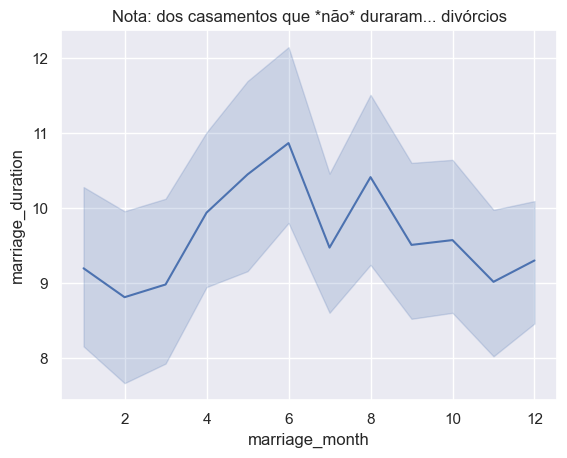

É necessário mais análise, tendo em conta os intervalos de confiança.


In [110]:
# Visualizing patterns over time
sns.lineplot(data=divorce, x="marriage_month", y="marriage_duration")
plt.title("Nota: dos casamentos que *não* duraram... divórcios")
plt.show()

print("É necessário mais análise, tendo em conta os intervalos de confiança.")

### Importing DateTime data

In [112]:
# Import divorce.csv, parsing the appropriate columns as dates in the import
divorce = pd.read_csv(data_folder + "divorce.csv", 
                      parse_dates=["divorce_date", "dob_man", "dob_woman", "marriage_date"])

divorce["marriage_month"] = divorce["marriage_date"].dt.month

print(divorce.dtypes)
divorce.head()

divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
marriage_month                int32
dtype: object


,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids,marriage_month
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0,6
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN,9
2,2011-01-02,1969-04-06,Preparatory,5000.0,1970-02-16,Professional,5000.0,2000-02-02,2.0,2.0,2
3,2011-01-02,1979-11-13,Secondary,12000.0,1981-05-13,Secondary,12000.0,2006-05-13,2.0,NaN,5
4,2011-01-02,1982-09-20,Professional,6000.0,1988-01-30,Professional,10000.0,2007-08-06,3.0,NaN,8


### Updating data type to DateTime

In [114]:
# Convert the marriage_date column to DateTime values
divorce["marriage_date"] = pd.to_datetime(divorce["marriage_date"])

### Visualizing relationships over time

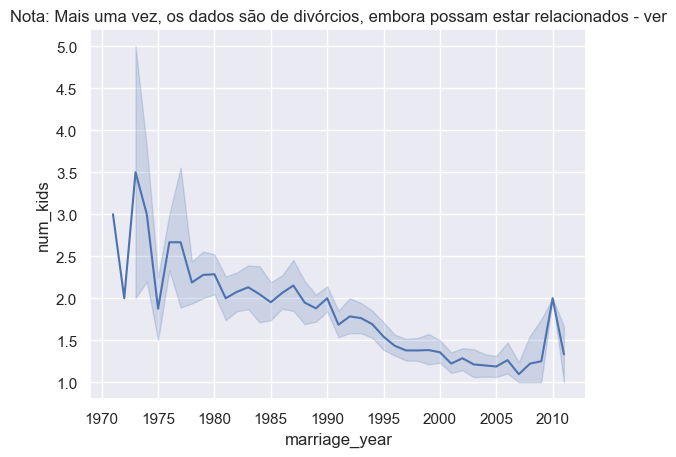

In [116]:
# Define the marriage_year column
divorce["marriage_year"] = divorce["marriage_date"].dt.year

# Create a line plot showing the average number of kids by year
sns.lineplot(data=divorce, x="marriage_year", y="num_kids")
plt.title("Nota: Mais uma vez, os dados são de divórcios, embora possam estar relacionados - ver")
plt.show()

## 3.2) Correlation

In [118]:
# vídeo

# Describes direction and strength of relationship between 2 variables.
# Set "numeric_only=True" to prevent errors with non-numeric columns

# Calculates Pearson correlation coefficient
display(divorce.corr(numeric_only=True))

,income_man,income_woman,marriage_duration,num_kids,marriage_month,marriage_year
income_man,1.000000,0.318047,0.085321,0.040848,0.013652,0.019170
income_woman,0.318047,1.000000,0.078677,-0.018015,0.041441,0.026433
marriage_duration,0.085321,0.078677,1.000000,0.447358,0.001433,-0.812469
num_kids,0.040848,-0.018015,0.447358,1.000000,-0.000551,-0.461495
marriage_month,0.013652,0.041441,0.001433,-0.000551,1.000000,-0.011456
marriage_year,0.019170,0.026433,-0.812469,-0.461495,-0.011456,1.000000


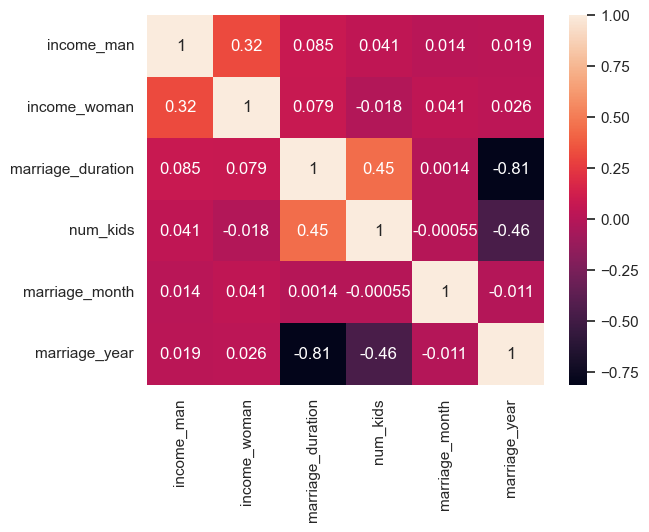

In [119]:
# Correlation heatmaps
sns.heatmap(divorce.corr(numeric_only=True), annot=True)
plt.show()

In [120]:
# Correlation in context
print(divorce["divorce_date"].min())
print(divorce["divorce_date"].max())

2000-01-08 00:00:00
2015-11-03 00:00:00


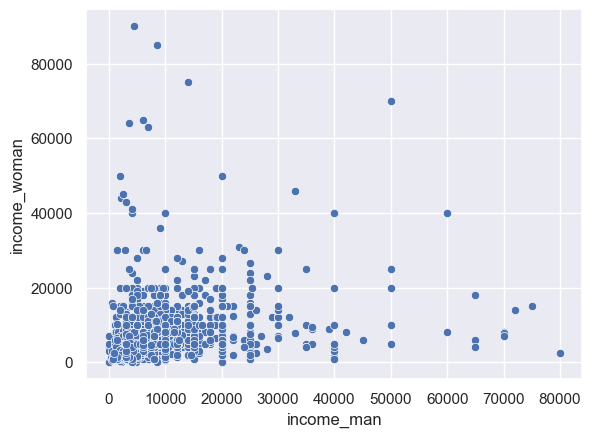

In [121]:
# Visualizing correlations - some cases not encapsuled - é importante ter isto em conta
# - Strong relationships but not linear
# - Quadratic relationships, not linear

# example
sns.scatterplot(data=divorce, x="income_man", y="income_woman")
plt.show()

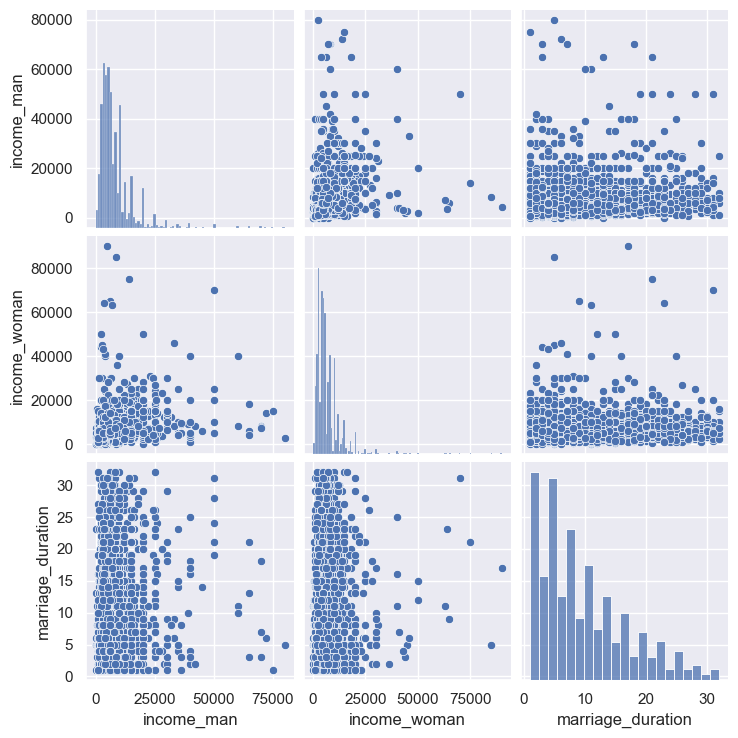

In [122]:
# Next level - Pairplots
sns.pairplot(data=divorce, vars=["income_man", "income_woman", "marriage_duration"])
plt.show()

### Interpreting a heatmap

In [124]:
# A later marriage_year is correlated with having fewer children.

### Visualizing variable relationships

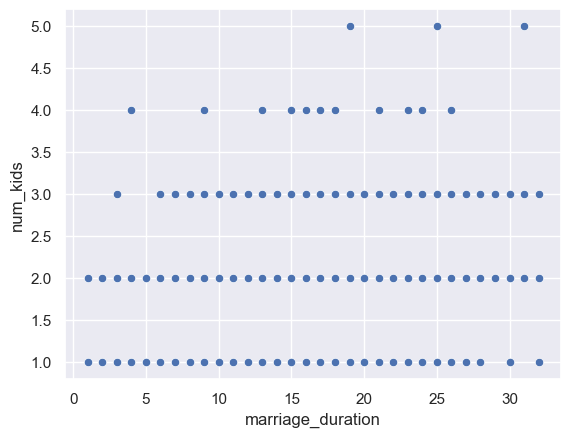

In [126]:
# Create the scatterplot
sns.scatterplot(data=divorce, x="marriage_duration", y="num_kids")
plt.show()

### Visualizing multiple variable relationships

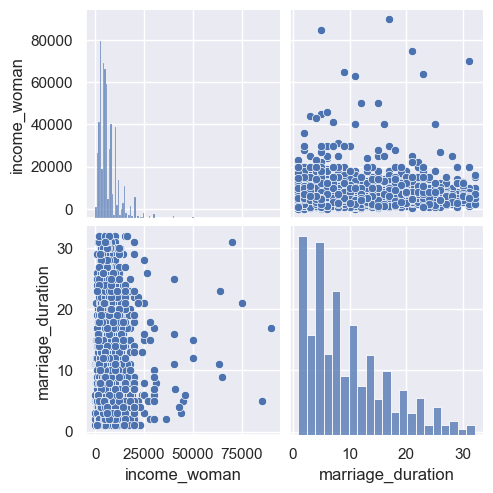

In [128]:
# Create a pairplot for income_woman and marriage_duration
sns.pairplot(data=divorce, vars=["income_woman" , "marriage_duration"])

# plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.2, hspace=0.4)
plt.show()

## 3.3) Factor relationships and distributions

education_man
Professional    1313
Preparatory      501
Secondary        288
Primary          100
Other              3
Name: count, dtype: int64

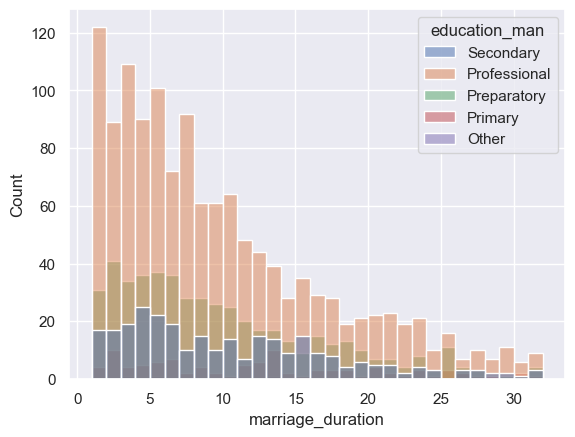

In [130]:
# vídeo

display(divorce["education_man"].value_counts())

sns.histplot(data=divorce, x="marriage_duration", hue="education_man", binwidth=1)
plt.show()

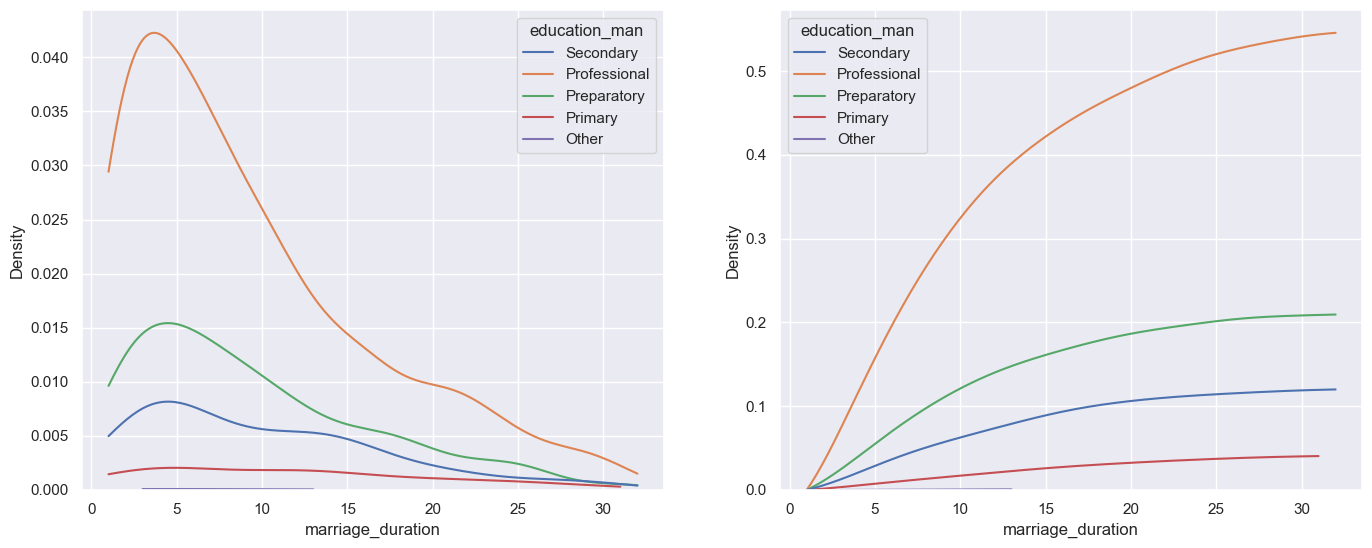

In [131]:
# Kernel Density Estimate (KDE) plots
plt.subplot(1, 2, 1)
sns.kdeplot(data=divorce, x="marriage_duration", hue="education_man", cut=0)

plt.subplot(1, 2, 2)
sns.kdeplot(data=divorce, x="marriage_duration", hue="education_man", cut=0, cumulative=True)

plt.subplots_adjust(left=0, bottom=0, right=2, top=1, wspace=0.2, hspace=0.4)
plt.show()

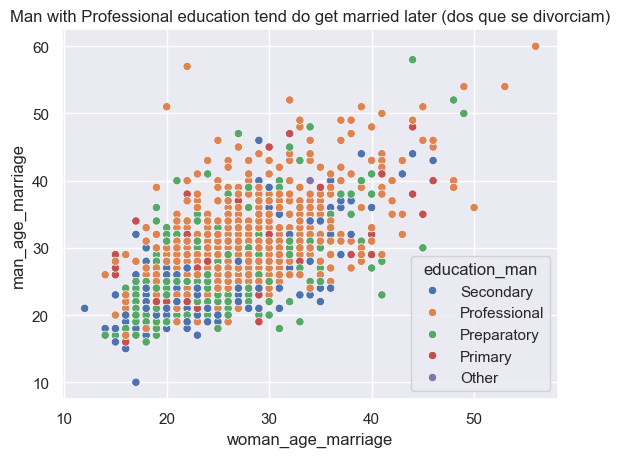

In [132]:
# Is there a relationship between age at marriage and education level?
divorce["man_age_marriage"] = divorce["marriage_year"] - divorce["dob_man"].dt.year
divorce["woman_age_marriage"] = divorce["marriage_year"] - divorce["dob_woman"].dt.year

sns.scatterplot(data=divorce, x="woman_age_marriage", y="man_age_marriage", hue="education_man")
plt.title("Man with Professional education tend do get married later (dos que se divorciam)")
plt.show()

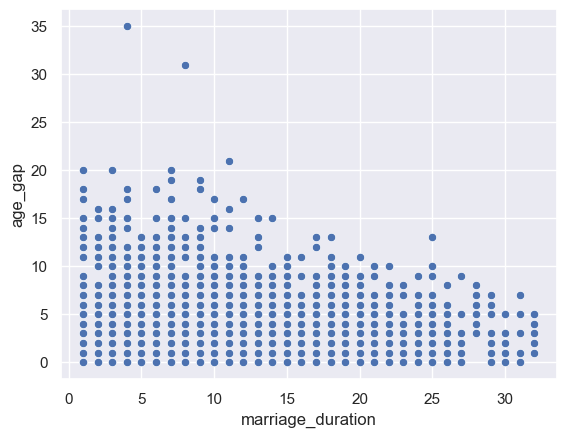

In [133]:
# compute age gap
divorce["age_gap"] = abs(divorce["man_age_marriage"] - divorce["woman_age_marriage"])

sns.scatterplot(data=divorce, x="marriage_duration", y="age_gap")
plt.show()

### Categorical data in scatter plots

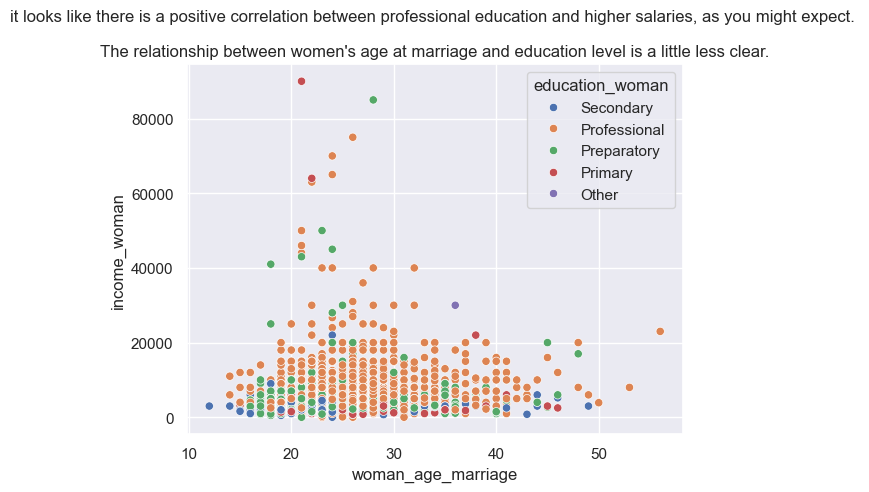

In [135]:
# Create the scatter plot
sns.scatterplot(data=divorce, x="woman_age_marriage", y="income_woman", hue="education_woman")

plt.title("""it looks like there is a positive correlation between professional education and higher salaries, as you might expect. \n
The relationship between women's age at marriage and education level is a little less clear.""")
plt.show()

### Exploring with KDE plots

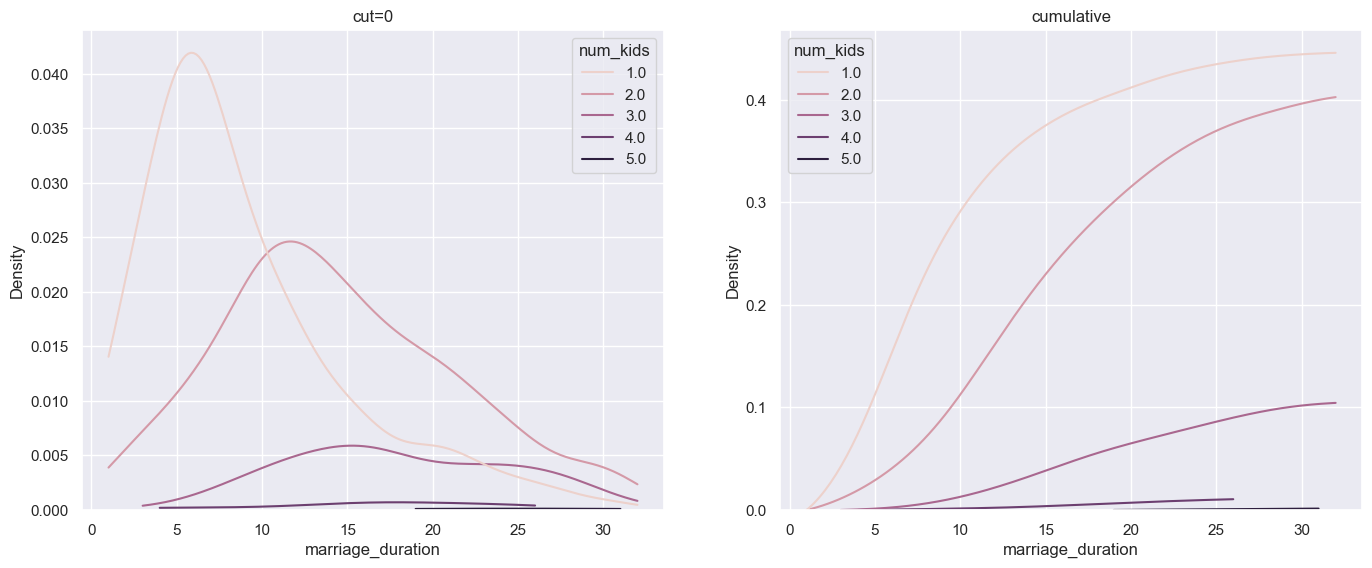

In [137]:
# Update the KDE plot 

plt.subplot(1, 2, 1)
sns.kdeplot(data=divorce, x="marriage_duration", hue="num_kids", cut=0)
plt.title("cut=0")

plt.subplot(1, 2, 2)
sns.kdeplot(data=divorce, x="marriage_duration", hue="num_kids", cut=0, cumulative=True)
plt.title("cumulative")

plt.subplots_adjust(left=0, bottom=0, right=2, top=1, wspace=0.2, hspace=0.4)
plt.show()

# 4) Turning Exploratory Analysis into Action

## 4.1) Considerations for categorical data

In [140]:
# vídeo

# Class imbalance -> watch out

# Class frequency (value_counts())

# Relative class frequency
# We know that 40% of internal Indian flights have a destination of Delhi. Is our sample data representative of the population? (no)
planes["Destination"].value_counts(normalize=True)


Destination
Cochin       0.429554
Banglore     0.270606
Delhi        0.117185
New Delhi    0.079597
Hyderabad    0.066454
Kolkata      0.036605
Name: proportion, dtype: float64

In [141]:
# Cross-tabulation
pd.crosstab(planes["Source"], planes["Destination"])#.loc["Delhi"]

Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Source,,,,,,
Banglore,0,0,954,0,0,648
Chennai,0,0,0,0,298,0
Delhi,0,3497,0,0,0,0
Kolkata,2203,0,0,0,0,0
Mumbai,0,0,0,541,0,0


In [142]:
planes.groupby("Source")["Destination"].count()

Source
Banglore    1602
Chennai      298
Delhi       3497
Kolkata     2203
Mumbai       541
Name: Destination, dtype: int64

In [143]:
# Extending cross-tabulation
pd.crosstab(planes["Source"], planes["Destination"], values=planes["Price"], aggfunc="median")

# Then compare with the real prices to check if our sample dataset is representative of the population!


Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Source,,,,,,
Banglore,NaN,NaN,4823.0,NaN,NaN,9514.5
Chennai,NaN,NaN,NaN,NaN,3850.0,NaN
Delhi,NaN,10262.0,NaN,NaN,NaN,NaN
Kolkata,9345.0,NaN,NaN,NaN,NaN,NaN
Mumbai,NaN,NaN,NaN,3625.0,NaN,NaN


### Checking for class imbalance

In [145]:
# Print the relative frequency of Job_Category
print(salaries["Job_Category"].value_counts(normalize=True))

print("""\nIt looks like {} is the most popular class and has a similar representation. Still, the other categories have 
quite different relative frequencies, which might not be surprising given the target audience is data scientists! Given the
difference in relative frequencies, can you trust the salaries DataFrame to accurately represent Managerial 
roles?""".format(salaries["Job_Category"].value_counts(normalize=True).index[0]))

Job_Category
Data Engineering    0.288303
Data Science        0.263591
Data Analytics      0.222405
Machine Learning    0.118616
Other               0.049423
Managerial          0.046129
Consultant          0.011532
Name: proportion, dtype: float64

It looks like Data Engineering is the most popular class and has a similar representation. Still, the other categories have 
quite different relative frequencies, which might not be surprising given the target audience is data scientists! Given the
difference in relative frequencies, can you trust the salaries DataFrame to accurately represent Managerial 
roles?


### Cross-tabulation

In [147]:
# Cross-tabulate Company_Size and Experience
display(pd.crosstab(salaries["Company_Size"], salaries["Experience"]))

Experience,Entry,Executive,Mid,Senior
Company_Size,,,,
L,29,11,86,72
M,30,12,98,186
S,29,3,29,22


In [148]:
# Cross-tabulate Job_Category and Company_Size
display(pd.crosstab(salaries["Job_Category"], salaries["Company_Size"]))

Company_Size,L,M,S
Job_Category,,,
Consultant,3,1,3
Data Analytics,32,91,12
Data Engineering,54,107,14
Data Science,56,81,23
Machine Learning,25,25,22
Managerial,14,11,3
Other,14,10,6


In [149]:
# Cross-tabulate Job_Category and Company_Size
display(pd.crosstab(salaries["Job_Category"], salaries["Company_Size"],
                    values=salaries["Salary_USD"], aggfunc="mean"))

Company_Size,L,M,S
Job_Category,,,
Consultant,77553.000000,5449.000000,75296.333333
Data Analytics,102997.125000,98125.835165,43074.500000
Data Engineering,113829.888889,116668.971963,85645.285714
Data Science,107865.303571,121664.888889,70426.869565
Machine Learning,123878.520000,100849.480000,85124.954545
Managerial,170102.857143,160419.454545,98976.333333
Other,96392.928571,83067.000000,70195.166667


## 4.2) Generating new features

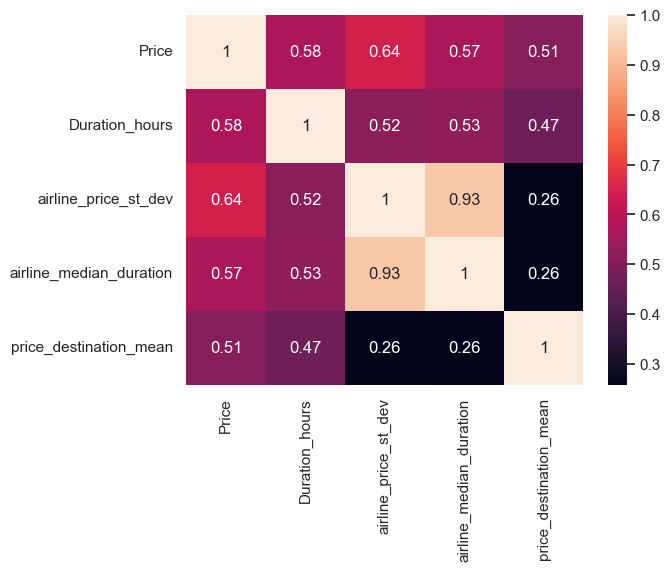

Airline                     object
Date_of_Journey             object
Source                      object
Destination                 object
Route                       object
Dep_Time                    object
Arrival_Time                object
Duration                    object
Total_Stops                 object
Additional_Info             object
Price                      float64
Duration_Category           object
Duration_hours             float64
airline_price_st_dev       float64
airline_median_duration    float64
price_destination_mean     float64
dtype: object


In [151]:
# vídeo

# Correlation
sns.heatmap(planes.corr(numeric_only=True), annot=True)
plt.show()

print(planes.dtypes) # Total_Stops should be numeric

In [152]:
# check how / what
display(planes["Total_Stops"].value_counts())

# Change / Cleaning "Total_Stops"
planes["Total_Stops"] = planes["Total_Stops"].str.replace(" stops", "") # 2, 3 and 4 
planes["Total_Stops"] = planes["Total_Stops"].str.replace(" stop", "") # 1
planes["Total_Stops"] = planes["Total_Stops"].str.replace("non-stop", "0") # 0
planes["Total_Stops"] = planes["Total_Stops"].astype(int)

Total_Stops
1 stop      4251
non-stop    2690
2 stops     1166
3 stops       33
4 stops        1
Name: count, dtype: int64

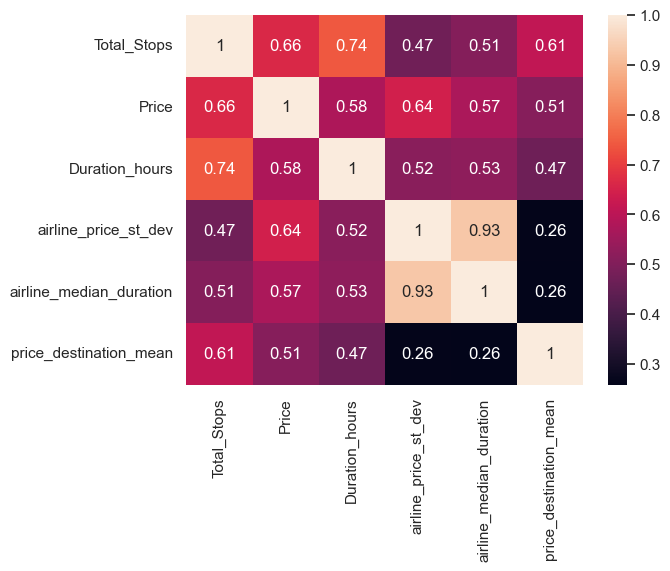

In [153]:
# Correlation (again)
sns.heatmap(planes.corr(numeric_only=True), annot=True)
plt.show()

In [154]:
# dtypes
planes.dtypes
planes["Date_of_Journey"]
planes["Date_of_Journey"] = pd.to_datetime(planes["Date_of_Journey"], format="%d/%m/%Y")

# Extract month and weekday
planes["month"] = planes["Date_of_Journey"].dt.month
planes["weekday"] = planes["Date_of_Journey"].dt.weekday

display(planes[["month", "weekday", "Date_of_Journey"]])

,month,weekday,Date_of_Journey
0,6,6,2019-06-09
1,5,6,2019-05-12
2,3,4,2019-03-01
3,6,0,2019-06-24
4,3,1,2019-03-12
...,...,...,...
10654,5,1,2019-05-21
10655,4,1,2019-04-09
10656,4,5,2019-04-27
10658,3,4,2019-03-01


In [155]:
# convert first "Dep_Time" to datetime
planes["Dep_Time"] = pd.to_datetime(planes["Dep_Time"], format="%H:%M")

# Change "Arrival_Time" format and convert to datetime
planes["Arrival_Time"] = planes["Arrival_Time"].apply(lambda x: x[:5])
planes["Arrival_Time"] = pd.to_datetime(planes["Arrival_Time"], format="%H:%M")

####################################

# Departing and arrival times
planes["Dep_Hour"] = planes["Dep_Time"].dt.hour
planes["Arrival_Hour"] = planes["Arrival_Time"].dt.hour


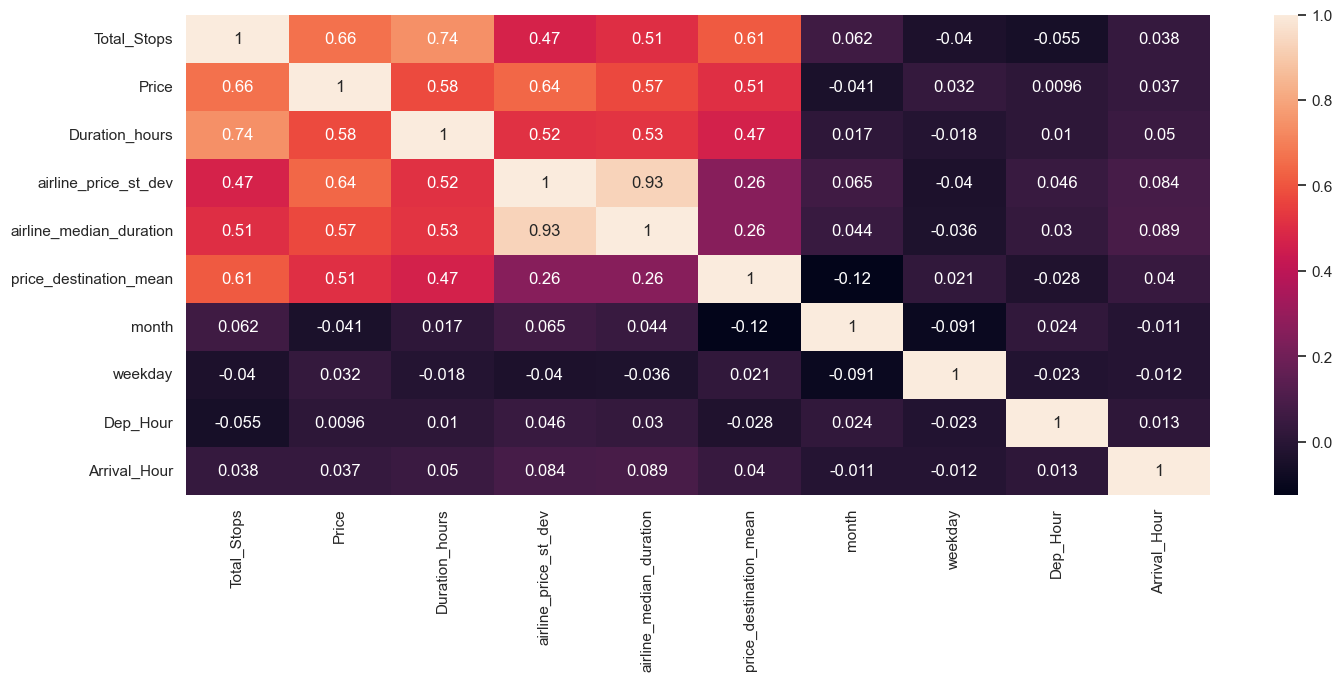

In [156]:
# Correlation (again)
sns.heatmap(planes.corr(numeric_only=True), annot=True)

plt.subplots_adjust(left=0, bottom=0, right=2, top=1, wspace=0.2, hspace=0.4)
plt.show()

In [157]:
# Creating categories
display(planes["Price"].describe())

# Descriptive statistics
twenty_fifth_planes = planes["Price"].quantile(0.25)
median_planes = planes["Price"].median()
seventy_fifth_planes = planes["Price"].quantile(0.75)
maximum_planes = planes["Price"].max()

# Labels and bins
labels_planes = ["Economy", "Premium Economy", "Business Class", "First Class"]
bins_planes = [0, twenty_fifth_planes, median_planes, seventy_fifth_planes, maximum_planes]

# pd.cut()
planes["Price_Category"] = pd.cut(planes["Price"], labels=labels_planes, bins=bins_planes)

# display
planes[["Price", "Price_Category"]]

count     8141.000000
mean      8873.148692
std       4002.789293
min       1759.000000
25%       5224.000000
50%       8372.000000
75%      12121.000000
max      22270.000000
Name: Price, dtype: float64

,Price,Price_Category
0,13882.0,First Class
1,6218.0,Premium Economy
2,13302.0,First Class
3,3873.0,Economy
4,11087.0,Business Class
...,...,...
10654,3257.0,Economy
10655,4107.0,Economy
10656,4145.0,Economy
10658,12648.0,First Class


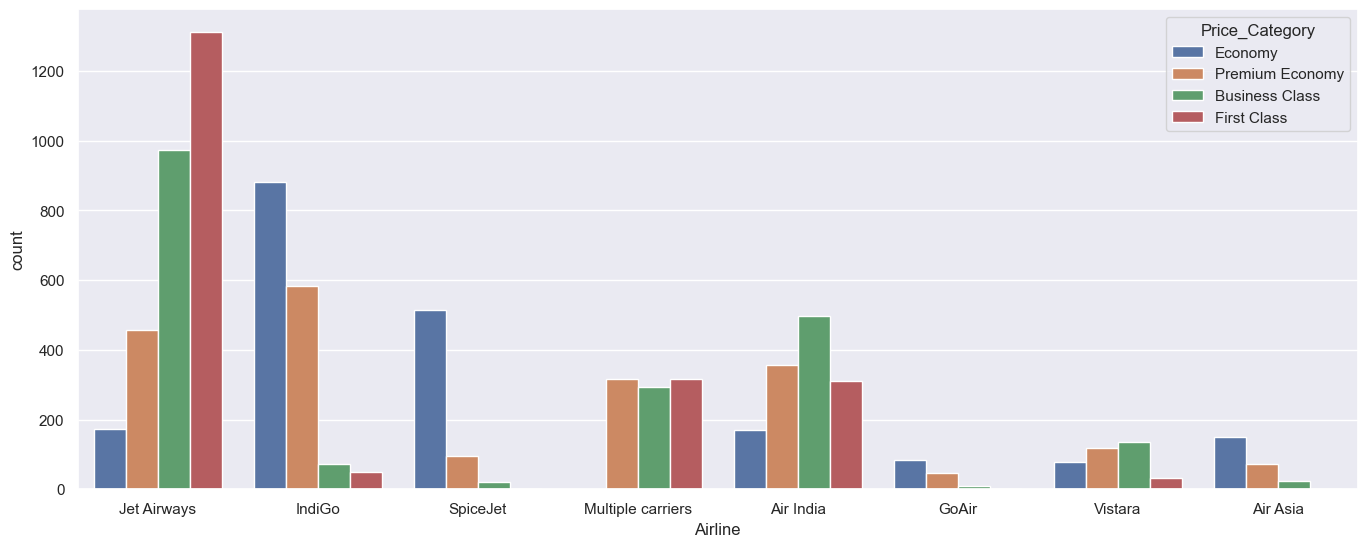

In [158]:
# Price catregory by airline
sns.countplot(data=planes, x="Airline", hue="Price_Category")

plt.subplots_adjust(left=0, bottom=0, right=2, top=1, wspace=0.2, hspace=0.4)
plt.show()

### Extracting features for correlation

In [160]:
# Generate random data just for the exercise

# stackoverflow
def random_dates(start_year, end_year, n=1):
    start = pd.to_datetime('{}-01-01'.format(start_year))
    end = pd.to_datetime('{}-12-31'.format(end_year))
    start_u = start.value//10**9
    end_u = end.value//10**9
    return pd.to_datetime(np.random.randint(start_u, end_u, n), unit='s')[0]

# Generate random dates of responses
salaries["date_of_response"] = salaries["Working_Year"].apply(lambda x: random_dates(start_year=x, end_year=x))
salaries["date_of_response"].head()

0   2020-02-27 07:45:11
1   2020-07-21 06:20:19
2   2020-08-08 21:17:31
3   2020-06-09 23:31:30
4   2020-07-13 07:44:40
Name: date_of_response, dtype: datetime64[ns]

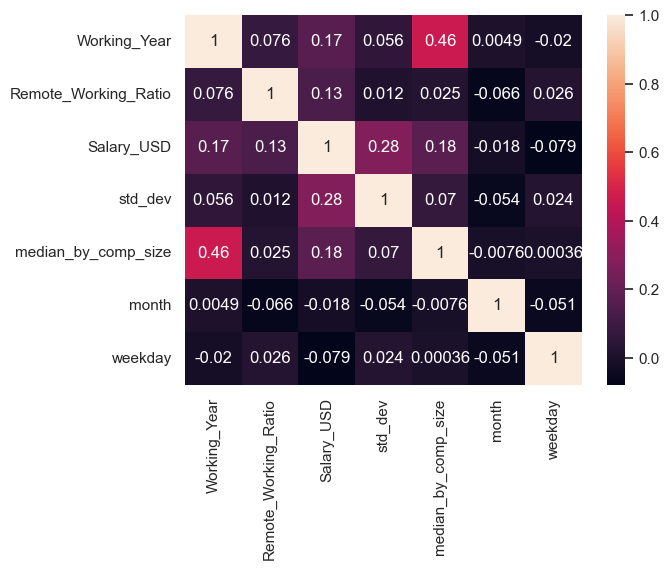

In [161]:
# Get the month of the response
salaries["month"] = salaries["date_of_response"].dt.month

# Extract the weekday of the response
salaries["weekday"] = salaries["date_of_response"].dt.weekday

# Create a heatmap
sns.heatmap(salaries.corr(numeric_only=True), annot=True)
plt.show()

### Calculating salary percentiles

In [163]:
# Find the 25th percentile
twenty_fifth = salaries["Salary_USD"].quantile(0.25)

# Save the median
salaries_median = salaries["Salary_USD"].median()

# Gather the 75th percentile
seventy_fifth = salaries["Salary_USD"].quantile(0.75)
print(twenty_fifth, salaries_median, seventy_fifth)

59893.0 96982.0 143225.0


### Categorizing salaries

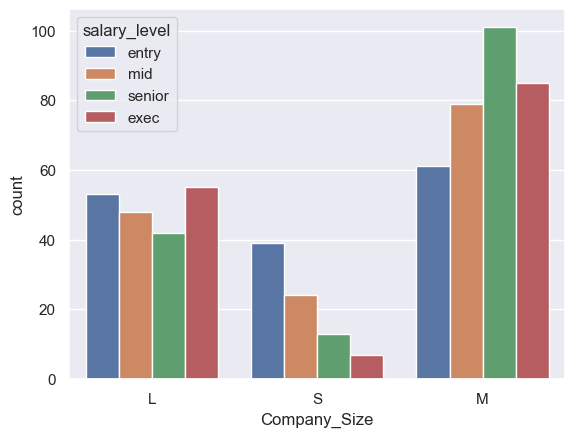

In [165]:
# Create salary labels
salary_labels = ["entry", "mid", "senior", "exec"]

# Create the salary ranges list
salary_ranges = [0, twenty_fifth, salaries_median, seventy_fifth, salaries["Salary_USD"].max()]

# Create salary_level
salaries["salary_level"] = pd.cut(salaries["Salary_USD"], bins=salary_ranges, labels=salary_labels)


# Plot the count of salary levels at companies of different sizes
sns.countplot(data=salaries, x="Company_Size", hue="salary_level")
plt.show()

By using pd.cut() to split out numeric data into categories, you can see that a large proportion of workers at small companies get paid "entry" level salaries, while more staff at medium-sized companies are rewarded with "senior" level salary. 

Now let's look at generating hypotheses as you reach the end of the EDA phase!

## 4.3) Generating hypotheses

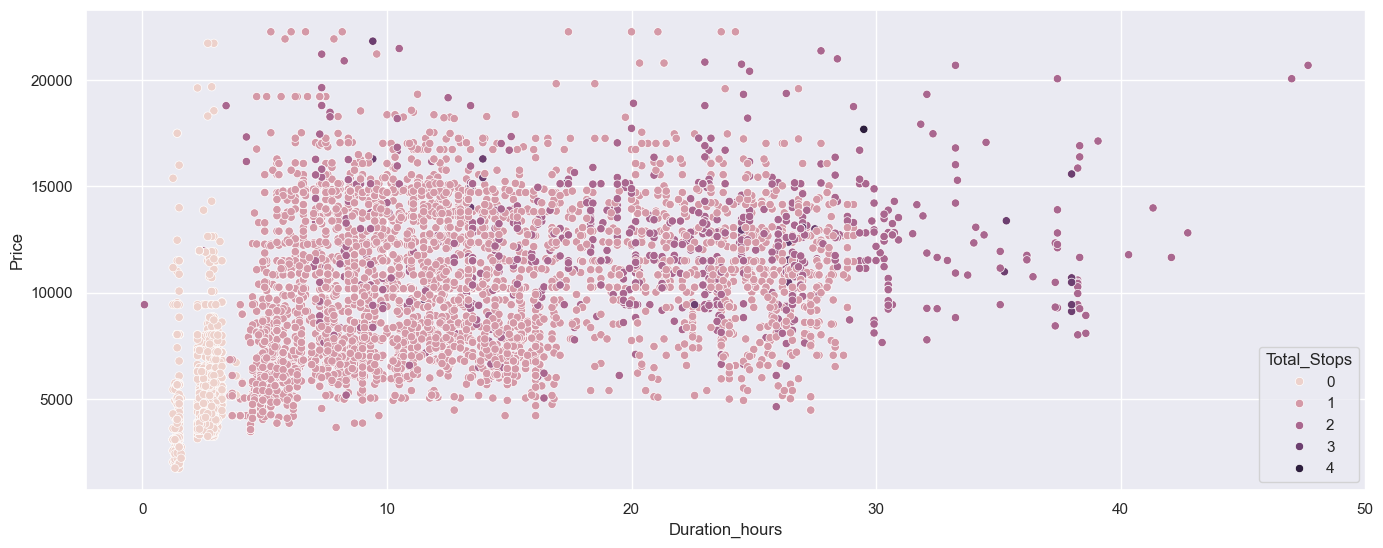

In [168]:
# vídeo

# What do we know?
# - not very meaningful correlations

# Spurious correlation
sns.scatterplot(data=planes, x="Duration_hours", y="Price", hue="Total_Stops")

plt.subplots_adjust(left=0, bottom=0, right=2, top=1, wspace=0.2, hspace=0.4)
plt.show()


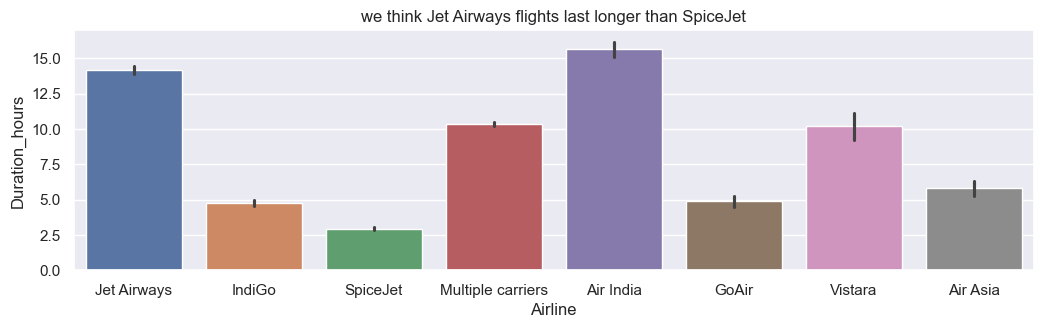

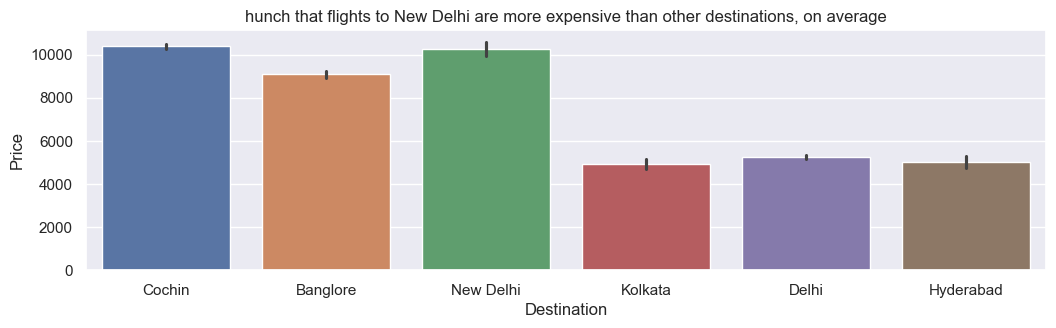

In [169]:
# Would data from a different time give the same results?
# Detecting relationships, differences, and patterns: --> Hypothesis Testing

# Hypotesis Testing requires, prior to data collection:
# - Generating a hypothesis or question
# - A decision on what statistical test to use

# Data snooping (p-hacking)

#####

# Generating hypotheses ---> through EDA, based on hunches!

# we think Jet Airways flights last longer than SpiceJet
sns.barplot(data=planes, x="Airline", y="Duration_hours", hue="Airline")
plt.title("we think Jet Airways flights last longer than SpiceJet")
plt.subplots_adjust(left=0, bottom=0, right=1.5, top=0.5, wspace=0.2, hspace=0.4)
plt.show()

# hunch that flights to New Delhi are more expensive than other destinations, on average
sns.barplot(data=planes, x="Destination", y="Price", hue="Destination")
plt.title("hunch that flights to New Delhi are more expensive than other destinations, on average")
plt.subplots_adjust(left=0, bottom=0, right=1.5, top=0.5, wspace=0.2, hspace=0.4)
plt.show()

# Next steps

# Design our experiment
# Steps:
# - Choosing a sample
# - Calculating how many data points we need
# - Deciding what statistical test to run


### Comparing salaries

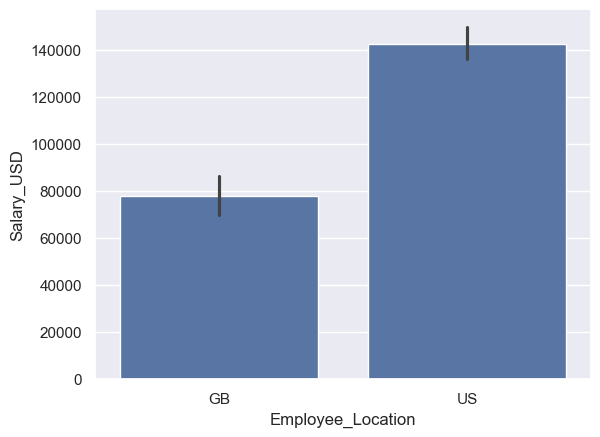

In [171]:
# Filter for employees in the US or GB
usa_and_gb = salaries[salaries["Employee_Location"].isin(["US", "GB"])]

# Create a barplot of salaries by location
sns.barplot(data=usa_and_gb, x="Employee_Location", y="Salary_USD")
plt.show()

### Choosing a hypothesis

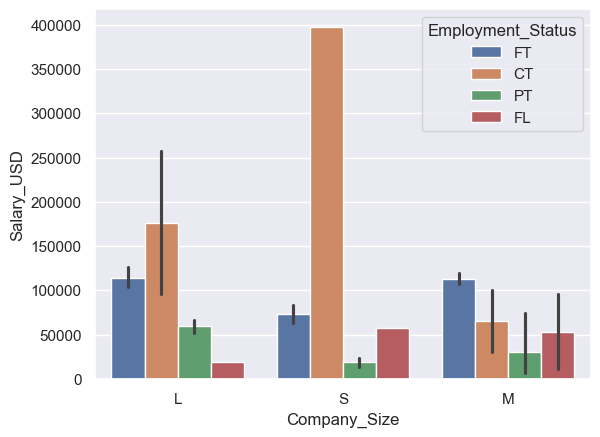

In [173]:
# Create a bar plot of salary versus company size, factoring in employment status
sns.barplot(data=salaries, x="Company_Size", y="Salary_USD", hue="Employment_Status")
plt.show()

Question
What is a reasonable hypothesis to generate based on this plot?

- Answer: On average, large companies pay contractors more than medium-sized companies.

# Fim